In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Users\karun\Downloads\portfolio project 1\Data ENG SCI ANA\New folder\Bronze_to_Silver.csv")
data

,deviceId,Timestamp,UsageKWh,Voltage,Current,Latitude,Longitude,IngestedAt
0,cva9x4nbf,47.170851,58.714177,57.723525,30.127207,45.1211,-90.0297,2025-08-16T18:12:41.365869Z
1,cva9x4nbf,13.538734,52.749258,56.803935,20.482084,34.0699,-72.8676,2025-08-16T18:12:41.365869Z
2,cva9x4nbf,62.624186,71.892496,78.631626,25.439626,45.4631,-107.0358,2025-08-16T18:12:41.365869Z
3,cva9x4nbf,84.348036,74.187124,65.251240,42.151981,34.8684,-106.8802,2025-08-16T18:12:41.365869Z
4,cva9x4nbf,40.774503,42.574419,56.695229,61.255732,41.9663,-102.4714,2025-08-16T18:12:41.365869Z
...,...,...,...,...,...,...,...,...
8357,cva9x4nbf,39.304679,71.554802,28.671269,63.559820,43.4459,-75.5979,2025-08-16T18:12:41.365869Z
8358,cva9x4nbf,67.254374,27.887532,3.983245,45.078195,42.4356,-114.0470,2025-08-16T18:12:41.365869Z
8359,cva9x4nbf,70.022952,21.036936,43.818962,17.437918,42.8524,-85.0563,2025-08-16T18:12:41.365869Z
8360,cva9x4nbf,51.445323,73.604584,35.762922,29.122063,41.9020,-87.5370,2025-08-16T18:12:41.365869Z


In [3]:
data1= data.drop("Timestamp",axis=1)
data1

,deviceId,UsageKWh,Voltage,Current,Latitude,Longitude,IngestedAt
0,cva9x4nbf,58.714177,57.723525,30.127207,45.1211,-90.0297,2025-08-16T18:12:41.365869Z
1,cva9x4nbf,52.749258,56.803935,20.482084,34.0699,-72.8676,2025-08-16T18:12:41.365869Z
2,cva9x4nbf,71.892496,78.631626,25.439626,45.4631,-107.0358,2025-08-16T18:12:41.365869Z
3,cva9x4nbf,74.187124,65.251240,42.151981,34.8684,-106.8802,2025-08-16T18:12:41.365869Z
4,cva9x4nbf,42.574419,56.695229,61.255732,41.9663,-102.4714,2025-08-16T18:12:41.365869Z
...,...,...,...,...,...,...,...
8357,cva9x4nbf,71.554802,28.671269,63.559820,43.4459,-75.5979,2025-08-16T18:12:41.365869Z
8358,cva9x4nbf,27.887532,3.983245,45.078195,42.4356,-114.0470,2025-08-16T18:12:41.365869Z
8359,cva9x4nbf,21.036936,43.818962,17.437918,42.8524,-85.0563,2025-08-16T18:12:41.365869Z
8360,cva9x4nbf,73.604584,35.762922,29.122063,41.9020,-87.5370,2025-08-16T18:12:41.365869Z


In [6]:
data1['Date'] = pd.to_datetime(data1['IngestedAt']).dt.strftime('%d %B %Y')
data1['Time'] = pd.to_datetime(data1['IngestedAt']).dt.strftime('%I:%M %p')
def get_day_night(hour):
    if 6<= hour < 18:
        return'Day'
    else:
        return'Night'
data1['DayNight'] = data1['IngestedAt'].dt.hour.apply(get_day_night)

In [7]:
data1['Hour'] = data1['IngestedAt'].dt.hour
data1['DayOfWeek'] = data1['IngestedAt'].dt.dayofweek
data1['IsWeekend'] = data1['DayOfWeek'].isin([5,6]).astype(int)
data1['Month'] = data1['IngestedAt'].dt.month

In [10]:
data1['IsWeekend'] = (data1['DayOfWeek'] >= 5).astype(int)
data1['Usage_lag1'] = data1['UsageKWh'].shift(1)
data1['Usage_lag24'] = data1['UsageKWh'].shift(24)

In [11]:
data1['Usage_roll3'] = data1['UsageKWh'].shift(1).rolling(window=3).mean()
data1['Usage_roll24'] = data1['UsageKWh'].shift(1).rolling(window=24).mean()

In [12]:
data1['IngestedAt'] = pd.to_datetime(data1['IngestedAt'])


In [16]:
data1

,deviceId,UsageKWh,Voltage,Current,Latitude,Longitude,IngestedAt,Date,Time,DayNight,Hour,DayOfWeek,IsWeekend,Month,Usage_lag1,Usage_lag24,Usage_roll3,Usage_roll24
0,cva9x4nbf,58.71,57.72,30.13,45.1211,-90.0297,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,NaN,NaN,NaN,NaN
1,cva9x4nbf,52.75,56.80,20.48,34.0699,-72.8676,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,58.714177,NaN,NaN,NaN
2,cva9x4nbf,71.89,78.63,25.44,45.4631,-107.0358,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,52.749258,NaN,NaN,NaN
3,cva9x4nbf,74.19,65.25,42.15,34.8684,-106.8802,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,71.892496,NaN,61.118644,NaN
4,cva9x4nbf,42.57,56.70,61.26,41.9663,-102.4714,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,74.187124,NaN,66.276293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,cva9x4nbf,71.55,28.67,63.56,43.4459,-75.5979,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,51.729452,36.410062,56.106458,50.079923
8358,cva9x4nbf,27.89,3.98,45.08,42.4356,-114.0470,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,71.554802,29.457190,54.399670,51.544287
8359,cva9x4nbf,21.04,43.82,17.44,42.8524,-85.0563,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,27.887532,57.560855,50.390595,51.478884
8360,cva9x4nbf,73.60,35.76,29.12,41.9020,-87.5370,2025-08-16 18:12:41.365869+00:00,16 August 2025,06:12 PM,Night,18,5,1,8,21.036936,66.917756,40.159757,49.957054


In [14]:
data1[['UsageKWh','Voltage','Current']]=data1[['UsageKWh','Voltage','Current']].round(2)

In [15]:
data1['deviceId'].unique()

array(['cva9x4nbf'], dtype=object)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8362 entries, 0 to 8361
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   deviceId      8362 non-null   object             
 1   UsageKWh      8362 non-null   float64            
 2   Voltage       8362 non-null   float64            
 3   Current       8362 non-null   float64            
 4   Latitude      8362 non-null   float64            
 5   Longitude     8362 non-null   float64            
 6   IngestedAt    8362 non-null   datetime64[ns, UTC]
 7   Date          8362 non-null   object             
 8   Time          8362 non-null   object             
 9   DayNight      8362 non-null   object             
 10  Hour          8362 non-null   int32              
 11  DayOfWeek     8362 non-null   int32              
 12  IsWeekend     8362 non-null   int32              
 13  Month         8362 non-null   int32              
 14  Usage_la

In [18]:
import folium

# Create the map centered at the first coordinate
map = folium.Map(location=[data1['Latitude'][0], data1['Longitude'][0]], zoom_start=10)

# Add markers for each location
for _, row in data1.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(map)

# Save the map to an HTML file
map.save("map.html")


In [19]:
import webbrowser
webbrowser.open("map.html")

True

In [20]:
data1.to_csv(r"C:\Users\karun\Downloads\portfolio project 1\Data ENG SCI ANA\New folder\Gold.csv",index=False)

In [23]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import lightgbm as lgb

features = [
    'Hour', 'Month', 'DayOfWeek', 'IsWeekend',
    'Voltage', 'Current', 'Usage_lag1', 'Usage_lag24',
    'Usage_roll3', 'Usage_roll24'
]

x = data1[features]
y = data1['UsageKWh']

In [45]:
split_index = int(len(data1) * 0.8)
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [46]:
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 6689, number of used features: 6
[LightGBM] [Info] Start training from score 49.987937


LGBMRegressor(learning_rate=0.05, n_estimators=500, objective='regression',
              random_state=42)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

📊 Model Performance:
MAE  : 12.782
RMSE : 16.673
R²   : 0.335


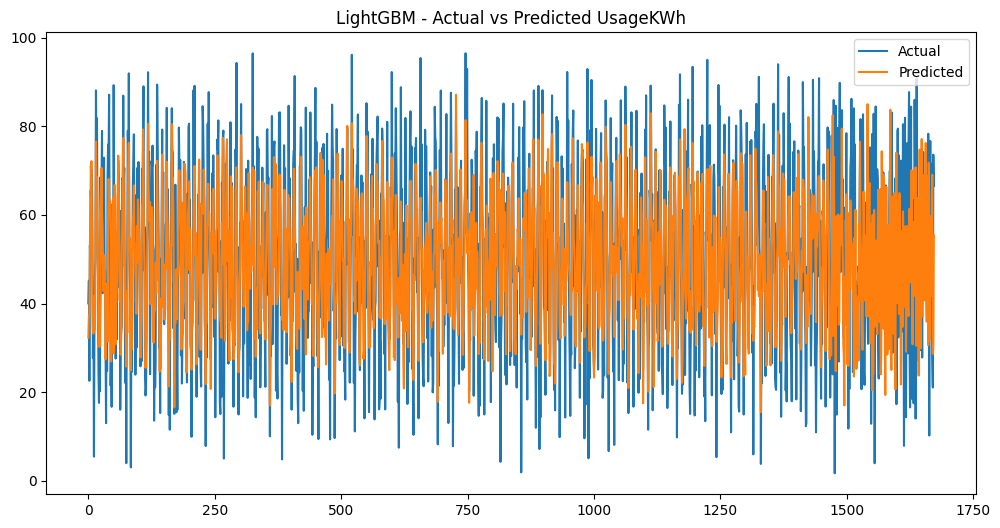

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("LightGBM - Actual vs Predicted UsageKWh")
plt.show()
